In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_csv('./employee/Train.csv')


In [6]:
df.head()


,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [7]:
per=df[['Gender','growth_rate']].groupby(['Gender']).agg('median')
per

,growth_rate
Gender,
F,48
M,47


c:\users\sapfi\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


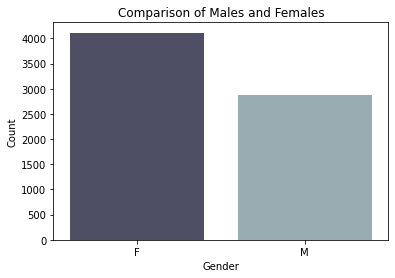

In [8]:
sns.countplot(df['Gender'], palette = 'bone')
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count');

c:\users\sapfi\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

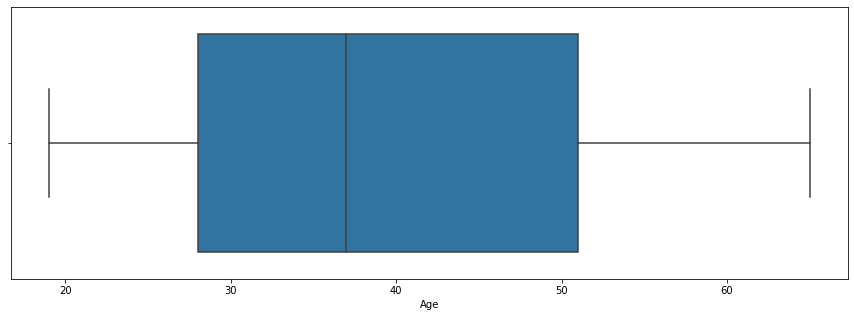

In [34]:
num_data=pd.DataFrame(df.dtypes[df.dtypes!="object"]).index

count = 0
fig, ax =plt.subplots(nrows=1, figsize=(15,5))
sns.boxplot(df[num_data[2]])

In [9]:
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Fill missing numeric values with median since it's more robust than the mean
            df[label] = content.fillna(content.median())
# Check if there's any null values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
            
            # Turn categorical variables into numbers
for label, content in df.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
         
        # We add the +1 because pandas encodes missing categories as -1
        df[label] = pd.Categorical(content).codes+1

In [10]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model
model = RandomForestRegressor(n_jobs=-1)

# Fit the model
model.fit(df.drop("Attrition_rate", axis=1), df.Attrition_rate.values)

model.score(df.drop("Attrition_rate", axis=1), df.Attrition_rate.values)


0.854369993064612

In [11]:
x=df.drop("Attrition_rate", axis=1)
y=df.Attrition_rate.values

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.20, random_state = 42)

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

from sklearn.metrics import mean_squared_log_error, mean_absolute_error
def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_val)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_val, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_val, val_preds),
              "Training R^2": model.score(x_train, y_train),
              "Valid R^2": model.score(x_val, y_val)}
    return scores


model = RandomForestRegressor(n_jobs=-1,
                              max_samples=2000)
model.fit(x_train, y_train)
show_scores(model)


(5600, 23)
(5600,)
(1400, 23)
(1400,)


{'Training MAE': 0.09539504892857142,
 'Valid MAE': 0.1333799542857143,
 'Training RMSLE': 0.09894298632851074,
 'Valid RMSLE': 0.14244611358116122,
 'Training R^2': 0.48415408619726863,
 'Valid R^2': -0.02608552203540393}

In [12]:
df_test = pd.read_csv("./employee/Test.csv")
df_test.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,...,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,...,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,...,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,...,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,...,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [13]:
def preprocess_data(df):
     
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            if pd.api.types.is_string_dtype(content):
                df[label]=content.astype("category").cat.as_ordered()
            
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1        
    
    return df

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [38]:
ideal_model = RandomForestRegressor(n_estimators=80,
                                    min_samples_leaf=4,
                                    min_samples_split=17,
                                    max_features='auto',
                                    n_jobs=-1
                                )
ideal_model.fit(x_train, y_train)

df_test=preprocess_data(df_test)
print(show_scores(ideal_model))


test_preds=ideal_model.predict(df_test)

{'Training MAE': 0.09539971382476557, 'Valid MAE': 0.1286486166430889, 'Training RMSLE': 0.10273346991099506, 'Valid RMSLE': 0.1409041921546728, 'Training R^2': 0.4237427864241846, 'Valid R^2': -0.016652200544790885}


In [16]:
y_train=y_train.astype('float')
y_train

array([0.1909, 0.1408, 0.1698, ..., 0.0014, 0.1338, 0.1946])

In [17]:
x_train

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
1032,4080,2,19.0,3,1,2,8,3,0.0,0,...,10.0,3,2.0,4,-0.1048,-2.7762,2.0,2,5,2
6339,1983,1,37.0,2,2,4,10,3,7.0,3,...,6.0,4,3.0,4,0.7516,-2.7762,2.0,4,8,3
3886,81,2,40.0,4,2,3,2,2,18.0,3,...,6.0,3,3.0,2,0.7516,0.7075,2.0,4,7,4
2653,2536,2,22.0,4,1,2,6,2,3.0,3,...,8.0,1,1.0,4,0.7516,-0.4537,2.0,4,6,4
6914,5924,1,49.0,5,1,2,7,2,18.0,3,...,7.0,3,2.0,2,-0.9612,1.8688,2.0,4,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,2593,2,22.0,3,1,3,7,1,3.0,1,...,4.0,3,2.0,1,-0.9612,-0.4537,2.0,3,8,5
5191,2702,2,64.0,3,1,2,11,1,36.0,3,...,4.0,3,2.0,3,0.7516,-0.4537,2.0,3,6,2
5226,2416,1,25.0,4,1,3,3,2,6.0,3,...,1.0,3,3.0,3,-0.1048,-0.4537,2.0,1,8,3
5390,2707,1,21.0,4,2,4,6,3,2.0,2,...,6.0,3,2.0,3,-0.9612,-0.4537,1.0,4,9,2


In [18]:
y_train

array([0.1909, 0.1408, 0.1698, ..., 0.0014, 0.1338, 0.1946])

In [19]:
ideal_model = GradientBoostingRegressor()

ideal_model.fit(x_train, y_train)

# df_test=preprocess_data(df_test)
print(show_scores(ideal_model))

test_preds=ideal_model.predict(df_test)

{'Training MAE': 0.12066073918568382, 'Valid MAE': 0.1270886920911339, 'Training RMSLE': 0.13076373428461818, 'Valid RMSLE': 0.1406015217139325, 'Training R^2': 0.10985760358691254, 'Valid R^2': -0.016896891676347447}


In [39]:
ideal_model = DecisionTreeRegressor()

ideal_model.fit(x_train, y_train)

# df_test=preprocess_data(df_test)
print(show_scores(ideal_model))

test_preds=ideal_model.predict(df_test)

{'Training MAE': 0.0, 'Valid MAE': 0.18322850000000002, 'Training RMSLE': 0.0, 'Valid RMSLE': 0.20028826165137267, 'Training R^2': 1.0, 'Valid R^2': -1.0885007332200147}


In [23]:
ideal_model = KNeighborsRegressor()

ideal_model.fit(x_train, y_train)

# df_test=preprocess_data(df_test)
print(show_scores(ideal_model))

test_preds=ideal_model.predict(df_test)

{'Training MAE': 0.11787333214285715, 'Valid MAE': 0.1397246857142857, 'Training RMSLE': 0.12510527664847443, 'Valid RMSLE': 0.14989755007850547, 'Training R^2': 0.1957365089726294, 'Valid R^2': -0.12882387178007337}


In [22]:
df_preds=pd.DataFrame()
df_preds['Employee_ID']=df_test["Employee_ID"]
df_preds["Attrition_rate"] = test_preds
df_preds

,Employee_ID,Attrition_rate
0,1703,0.223531
1,2959,0.290546
2,1629,0.207083
3,2710,0.205909
4,2581,0.195375
...,...,...
2995,1678,0.198880
2996,13,0.227551
2997,2657,0.182028
2998,2406,0.194590
